In [2]:
names_dict = {
    "C1M_School_closing": "School Closing",
    "C2M_Workplace_closing": "Workplace Closing",
    "C3M_Cancel_public_events": "Cancel Public Events",
    "C4M_Restrictions_on_gatherings": "Restrictions on Gatherings",
    "C5M_Close_public_transport": "Close Public Transport",
    "C6M_Stay_at_home_requirements": "Stay at Home Requirements",
    "C7M_Restrictions_on_internal_movement": "Restrictions on Internal Movement",
    "C8EV_International_travel_controls": "International Travel Controls",
    "E1_Income_support": "Income Support",
    "E2_Debt/contract_relief": "Debt/Contract Relief",
    "E3_Fiscal_measures": "Fiscal Measures",
    "E4_International_support": "International Support",
    "H1_Public_information_campaigns": "Public Information Campaigns",
    "H2_Testing_policy": "Testing Policy",
    "H3_Contact_tracing": "Contact Tracing",
    "H4_Emergency_investment_in_healthcare": "Emergency Investment in Healthcare",
    "H5_Investment_in_vaccines": "Investment in Vaccines",
    "H6M_Facial_Coverings": "Facial Coverings",
    "H7_Vaccination_policy": "Vaccination Policy",
    "H8M_Protection_of_elderly_people": "Protection of Elderly People",
    "V1_Vaccine_Prioritisation_(summary)": "Vaccine Prioritisation",
    "V2A_Vaccine_Availability_(summary)": "Vaccine Availability",
    "V3_Vaccine_Financial_Support_(summary)": "Vaccine Financial Support",
    "V4_Mandatory_Vaccination_(summary)": "Mandatory Vaccination"
}
color_dict = {
    "C1M_School_closing": "red",
    "C2M_Workplace_closing": "red",
    "C3M_Cancel_public_events": "red",
    "C4M_Restrictions_on_gatherings": "red",
    "C5M_Close_public_transport": "red",
    "C6M_Stay_at_home_requirements": "red",
    "C7M_Restrictions_on_internal_movement": "red",
    "C8EV_International_travel_controls": "red",
    "E1_Income_support": "blue",
    "E2_Debt/contract_relief": "blue",
    "E3_Fiscal_measures": "blue",
    "E4_International_support": "blue",
    "H1_Public_information_campaigns": "green",
    "H2_Testing_policy": "green",
    "H3_Contact_tracing": "green",
    "H4_Emergency_investment_in_healthcare": "green",
    "H5_Investment_in_vaccines": "green",
    "H6M_Facial_Coverings": "green",
    "H7_Vaccination_policy": "green",
    "H8M_Protection_of_elderly_people": "green",
    "V1_Vaccine_Prioritisation_(summary)": "purple",
    "V2A_Vaccine_Availability_(summary)": "purple",
    "V3_Vaccine_Financial_Support_(summary)": "purple",
    "V4_Mandatory_Vaccination_(summary)": "purple"
}
style_dict = {
    "C1M_School_closing": "-",
    "C2M_Workplace_closing": "--",
    "C3M_Cancel_public_events": "-.",
    "C4M_Restrictions_on_gatherings": ":",
    "C5M_Close_public_transport": "-",
    "C6M_Stay_at_home_requirements": "--",
    "C7M_Restrictions_on_internal_movement": "-.",
    "C8EV_International_travel_controls": ":",
    "E1_Income_support": "-",
    "E2_Debt/contract_relief": "--",
    "E3_Fiscal_measures": "-.",
    "E4_International_support": ":",
    "H1_Public_information_campaigns": "-",
    "H2_Testing_policy": "--",
    "H3_Contact_tracing": "-.",
    "H4_Emergency_investment_in_healthcare": ":",
    "H5_Investment_in_vaccines": "-",
    "H6M_Facial_Coverings": "--",
    "H7_Vaccination_policy": "-.",
    "H8M_Protection_of_elderly_people": ":",
    "V1_Vaccine_Prioritisation_(summary)": "-",
    "V2A_Vaccine_Availability_(summary)": "--",
    "V3_Vaccine_Financial_Support_(summary)": "-.",
    "V4_Mandatory_Vaccination_(summary)": ":"
}

#### Importing Libraries

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.simplefilter('ignore')

### Loading and pre-preparing data
I have chosen to supplement the owid .....

In [271]:
#Load Both DataSets
df_owid = pd.read_csv('/Users/elliottoates/Library/CloudStorage/OneDrive-UniversityofExeter/Second Year/Data Science/Project/data/owid-covid-data.csv')
df_oxford = pd.read_csv('/Users/elliottoates/Library/CloudStorage/OneDrive-UniversityofExeter/Second Year/Data Science/Project/OxCGRT_nat_latest.csv')

#Convert the Date into same format so that the data frames can be merged
df_oxford['Date'] = pd.to_datetime(df_oxford['Date'], format='%Y%m%d')
df_oxford['Date'] = df_oxford['Date'].dt.strftime('%Y-%m-%d')

In [272]:
#Merging where Isocode_matches Country code and date matches Date.
merged_df = pd.merge(df_owid, df_oxford, left_on=['iso_code', 'date'], right_on=['CountryCode', 'Date'])

In [273]:
merged_df=merged_df.drop(columns = ['CountryName','CountryCode','RegionName','RegionCode','Date'])
merged_df = merged_df.rename(columns=lambda x: x.replace(' ', '_'))
df = merged_df

part 1

Figure 1 Stringency index & vaccine graph from problem 3

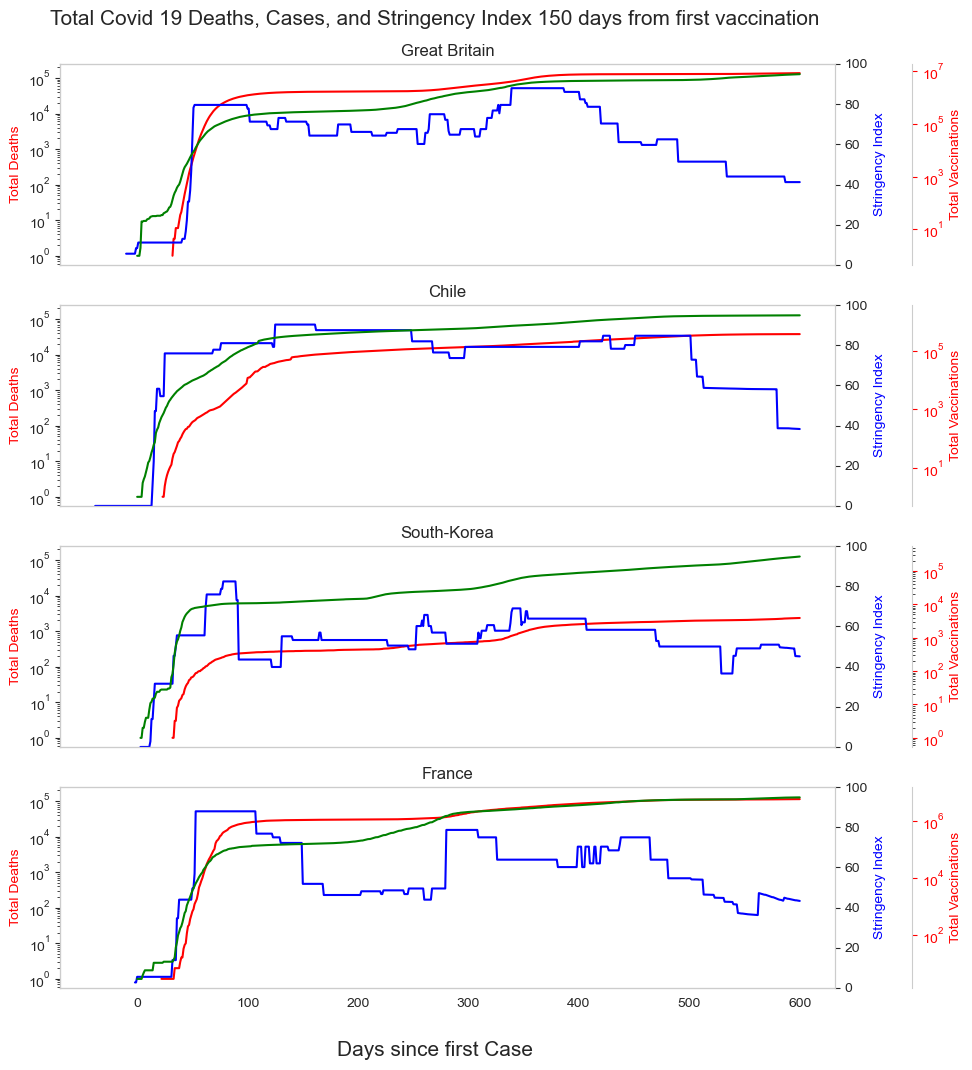

In [290]:
def make_dfs(x):
    # Filter data for the given ISO code and calculate days since first vaccination
    y = df[df['iso_code'].str.contains(x)]
    y['date'] = y['date'].apply(pd.to_datetime)
    y['Days Since 1st Case'] = (y['date'] - (y.loc[df['total_cases'] >= 1, 'date'].iloc[0])).dt.days

    # Filter data to only include dates within a certain range and select relevant columns
    y = y[y['Days Since 1st Case'] <= 365]
    y = y[y['Days Since 1st Case'] >= -365]
    y = y[['iso_code', 'total_deaths', 'total_cases', 'stringency_index', 'Days Since 1st Case','date']]

    # Remove any rows with missing data in the stringency_index column and reset index
    y = y[y['stringency_index'].notna()]
    y = y.reset_index(drop=True)

    return y

# Create a figure with 4 subplots, each representing a different country
fig, (ax, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(10, 12), sharex=True, sharey=True)
plt.suptitle('Total Covid 19 Deaths, Cases, and Stringency Index a year from first Case', size=15,
             weight='ultralight', y=0.925)
fig.supxlabel('Days since first Case', size=15, y=0.05)

# List of the four subplots
axes = [ax, ax1, ax2, ax3]

# Add plot titles for each subplot
ax.set(title='Great Britain')
ax1.set(title='Chile')
ax2.set(title='South-Korea')
ax3.set(title='France')

# Remove gridlines from all subplots
ax.grid(False)
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

# Loop through each ISO code and corresponding subplot, adding two y-axes to each plot
for i, z in zip(isocodes, axes):
    axa = z.twinx()

    # Create a DataFrame for the current ISO code and extract relevant columns
    x = make_dfs(i)['Days Since 1st Case']
    y1 = make_dfs(i)['total_deaths']
    y2 = make_dfs(i)['stringency_index']
    y3 = make_dfs(i)['total_cases']

    # Plot total deaths and total vaccinations on the left y-axis
    z.plot(x, y1, color='r')
    z.plot(x, y3, color='g')

    # Plot stringency index on the first right y-axis
    axa.plot(x, y2, color='b')

    # Add y-axis labels and set scales for each axis
    z.set_ylabel('total count', color='black')
    z.set(yscale='log')

    axa.set_ylabel('Stringency Index', color='b')
    axa.set_ylim(0, 100)

    # Customize the ticks
    axa.grid(False)

caption = 'Figure 1: A line chart that tracks the total deaths, cases and stringency index a year for a year from the first recorded \ncase for four select countries. Total Covid -19 Deaths and Cases are tracked on the left and Stringency index on the right'

fig.text(.1,-.005,caption,fontstyle = 'italic')
plt.show()


### Figure 3

Now since we can look at different policies specifically we can look at which ones where implemented the most
with the data set on policies here are the individual policies we can now look at



In [11]:
#Set the policy to look at
policy = 'C1M_School_closing'

# count the number of countries that have a non-zero value for the policy (C1M school closing)
non_zero_count = df.loc[df[policy] != 0, "iso_code"].nunique()
# calculate the proportion of countries that have a non-zero value for the policy
total_countries = df["iso_code"].nunique()
proportion_non_zero = non_zero_count / total_countries

# count the number of countries that have a max value
max_value = df[policy].max()
max_value_count = df.loc[df[policy] == max_value, "iso_code"].nunique()
proportion_max_value = max_value_count / total_countries

# Count the number of countries that have changed value on policy more than 3 times
policy_changes = df.loc[df[policy].diff() != 0, ["iso_code", policy]] #new df with only rows where policy change
changes_by_country = policy_changes.groupby("iso_code").count().rename(columns={policy: "count"})
multiple_implementations = (changes_by_country["count"] > 3).sum()
proportion_multiple_implementations = multiple_implementations / total_countries


#Pringtin.
print('Proportion of countries that implemented policy :', proportion_non_zero,
      '\nProportion of countries that implemented policy at max level for respective policy :',proportion_max_value,
      '\nProportion of countries that changed their level of policy more than 3 times :',proportion_multiple_implementations)

Proportion of countries that implemented policy : 1.0 
Proportion of countries that implemented policy at max level for respective policy : 0.956989247311828 
Proportion of countries that changed their level of policy more than 3 times : 0.9408602150537635


### Figure 4
Now want to make a graph for all policies so need to find a way to do that for all policies

In [13]:
# define a list of policy column names
policies_bar = ["C1M_School_closing",
                "C2M_Workplace_closing",
                "C3M_Cancel_public_events",
                "C4M_Restrictions_on_gatherings",
                "C5M_Close_public_transport",
                "C6M_Stay_at_home_requirements",
                "C7M_Restrictions_on_internal_movement",
                "C8EV_International_travel_controls",
                "E1_Income_support",
                "E2_Debt/contract_relief",
                "H1_Public_information_campaigns",
                "H2_Testing_policy",
                "H3_Contact_tracing",
                "H6M_Facial_Coverings",
                "H7_Vaccination_policy",
                "H8M_Protection_of_elderly_people",
                "V1_Vaccine_Prioritisation_(summary)",
                "V2A_Vaccine_Availability_(summary)",
                "V3_Vaccine_Financial_Support_(summary)"]

policy_proportions = {}

for policy in policies_bar:
    max_value = df[policy].max()
    non_zero_count = df.loc[df[policy] != 0, "iso_code"].nunique()
    max_value_count = df.loc[df[policy] == max_value, "iso_code"].nunique()
    total_countries = df["iso_code"].nunique()
    proportion_non_zero = non_zero_count / total_countries
    proportion_max_value = max_value_count / total_countries

    policy_changes = df.loc[df[policy].diff() != 0, ["iso_code", policy]]
    changes_by_country = policy_changes.groupby("iso_code").count().rename(columns={policy: "count"})
    multiple_implementations = (changes_by_country["count"] > 3).sum()
    proportion_multiple_implementations = multiple_implementations / total_countries

    policy_proportions[policy] = {"Implemented at any level": proportion_non_zero,
                                  "Implemented at maximum level": proportion_max_value,
                                  "Level of policy changed more than 3 times": proportion_multiple_implementations}

policy_df = pd.DataFrame.from_dict(policy_proportions, orient='index')

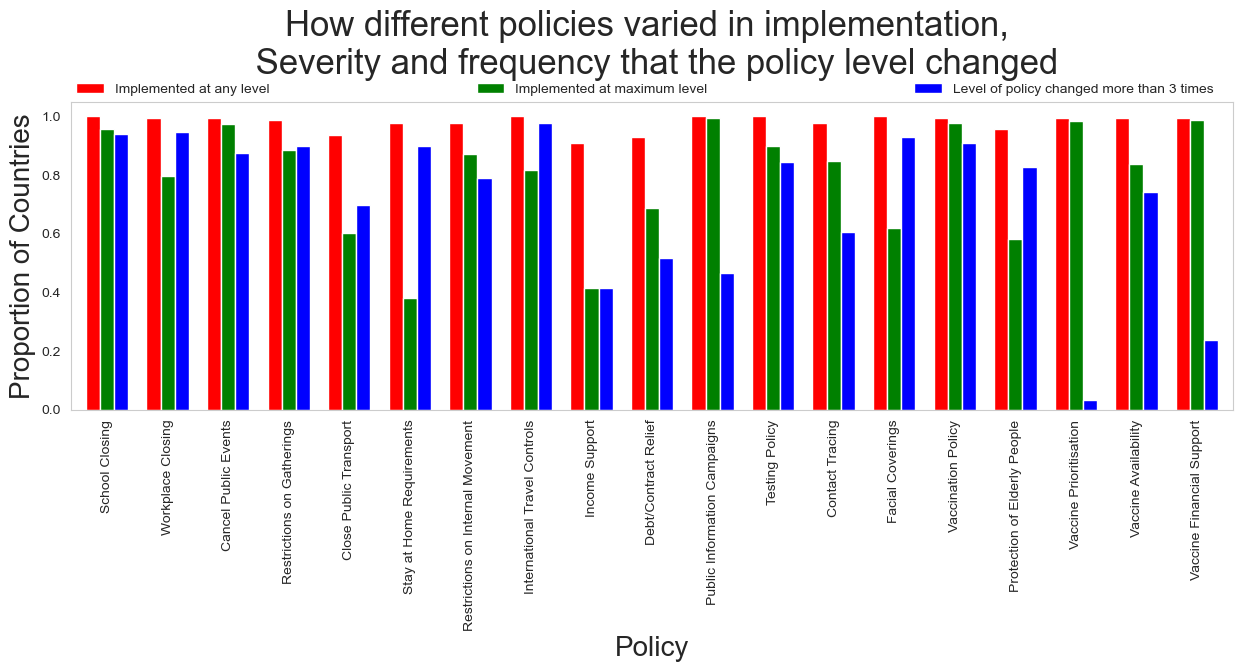

In [14]:
fig, ax = plt.subplots(figsize=(15, 4))

policy_df.plot.bar(ax=ax,y=['Implemented at any level', 'Implemented at maximum level', 'Level of policy changed more than 3 times'],
                   color=['r', 'g', 'b'],
                   width =0.7,
                   )

# Set the x-label and y-label
ax.set_xlabel('Policy',size = 20)
ax.set_ylabel('Proportion of Countries',size = 20)
ax.set_xticklabels((names_dict[policy] for policy in policies_bar),rotation = 90)

#Set the X-ticks
ax.legend(loc= (0,1), ncol=3,mode = 'expand',frameon = False)

# Set the title
plt.title('How different policies varied in implementation, \n Severity and frequency that the policy level changed',
          size = 25,
          pad=20)

ax.grid(False)
# Show the plot
plt.show()

# Plot 4
Sequencing of initial policy adoption (from first policy enacted) and reduction (from first policy eased).

In [16]:
# define a list of policy column names
policies_line = ["C1M_School_closing",
                 "C2M_Workplace_closing",
                 "C3M_Cancel_public_events",
                 "C4M_Restrictions_on_gatherings",
                 "E1_Income_support",
                 "E2_Debt/contract_relief",
                 "E3_Fiscal_measures",
                 "E4_International_support",
                 "H1_Public_information_campaigns",
                 "H2_Testing_policy",
                 "H3_Contact_tracing",
                 "H4_Emergency_investment_in_healthcare",]
# Group the data by date and calculate the proportion of non-zero values for each policy
policy_daily_prop = df.groupby('date')[policies_line].apply(lambda x: (x.ne(0).sum() / x.notna().sum()))
policy_daily_prop = policy_daily_prop.loc['2020-01-01':'2020-07-01']

import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

policy_daily_prop.plot(kind="line", ax=ax, lw=1, color=[color_dict[policy] for policy in policies_line], style=[style_dict[policy] for policy in policies_line])

ax.set_xlabel("Date")
ax.set_ylabel("Proportion of Countries")
ax.set_title("Proportion of Countries Implementing Each Policy over Time")

ax.legend(labels=[names_dict[policy] for policy in policies_line], loc=(0,-0.3), ncol=3, mode='expand', frameon=False)

# Set the tick interval to every first of the month
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%2020-%m-%d'))
ax.grid(False)
plt.show()

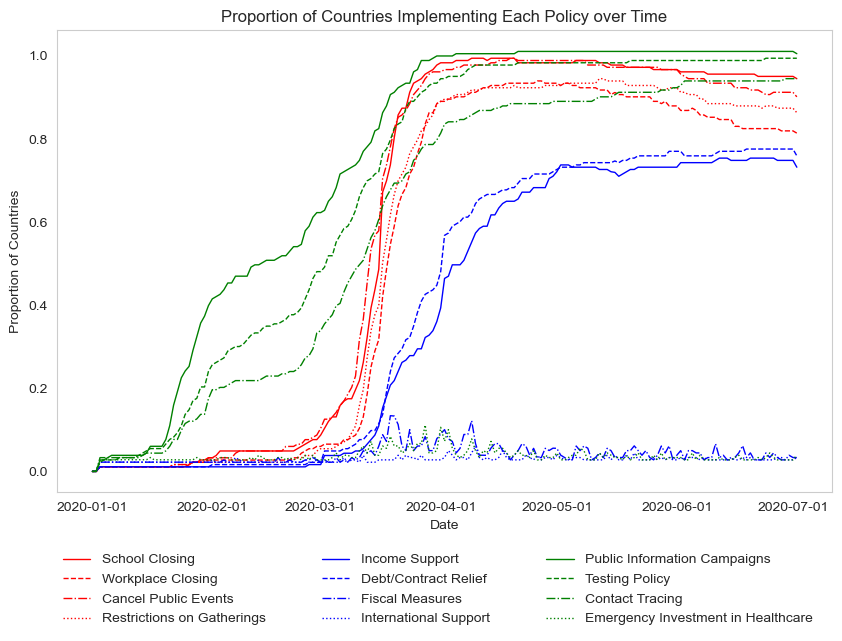

### Pie chart (new cases per mill) new deaths (per mill)


In [298]:
country = "United Kingdom"

In [299]:
# Calculate the global average of new_cases_smoothed_per_million across all countries for each date
global_avg_cases = df_relative_strength.groupby("date")["new_cases_smoothed_per_million"].mean()

# Find the date where the new_cases_smoothed_per_million for the specific isocode is the lowest and highest compared to the global average
lowest_case_date = global_avg_cases.sub(
    df_relative_strength[df_relative_strength["location"] == country].set_index("date")[
        "new_cases_smoothed_per_million"]).idxmax()
highest_case_date = global_avg_cases.sub(
    df_relative_strength[df_relative_strength["location"] == country].set_index("date")[
        "new_cases_smoothed_per_million"]).idxmin()

# Calculate the global average of new_cases_smoothed_per_million across all countries for each date
global_avg_deaths = df_relative_strength.groupby("date")["new_deaths_smoothed_per_million"].mean()

# Find the date where the new_cases_smoothed_per_million for the specific isocode is the lowest and highest compared to the global average
lowest_death_date = global_avg_cases.sub(
    df_relative_strength[df_relative_strength["location"] == country].set_index("date")[
        "new_deaths_smoothed_per_million"]).idxmax()
highest_death_date = global_avg_cases.sub(
    df_relative_strength[df_relative_strength["location"] == country].set_index("date")[
        "new_deaths_smoothed_per_million"]).idxmin()

# Return the date for the lowest and highest new_cases_smoothed_per_million for the specific isocode
print(f"Date with the lowest new cases per million relative to global mean for {country}: {lowest_case_date}")
print(f"Date with the highest new cases per million relative to global mean for {country}: {highest_case_date}")
# Return the date for the lowest and highest new_cases_smoothed_per_million for the specific isocode
print(f"Date with the lowest new deaths per million relative to global mean for {country}: {lowest_death_date}")
print(f"Date with the highest new deaths per million relative to global mean for {country}: {highest_death_date}")

Date with the lowest new cases per million relative to global mean for United Kingdom: 2021-04-15
Date with the highest new cases per million relative to global mean for United Kingdom: 2022-01-06
Date with the lowest new deaths per million relative to global mean for United Kingdom: 2022-01-31
Date with the highest new deaths per million relative to global mean for United Kingdom: 2020-04-15


In [302]:
policy_list = ['C1M_School_closing',
               'C2M_Workplace_closing',
               'C3M_Cancel_public_events',
               'C4M_Restrictions_on_gatherings',
               'C5M_Close_public_transport',
               'C6M_Stay_at_home_requirements',
               'C7M_Restrictions_on_internal_movement',
               'C8EV_International_travel_controls',
               'E1_Income_support',
               'E2_Debt/contract_relief',
               'H1_Public_information_campaigns',
               'H2_Testing_policy',
               'H3_Contact_tracing',
               'H6M_Facial_Coverings',
               'H7_Vaccination_policy',
               'H8M_Protection_of_elderly_people',
               'V1_Vaccine_Prioritisation_(summary)',
               'V2A_Vaccine_Availability_(summary)',
               'V3_Vaccine_Financial_Support_(summary)',
               'V4_Mandatory_Vaccination_(summary)']

df_relative_strength = df.copy()
df_relative_strength = df_relative_strength[df_relative_strength['date']>'2020-03-30']

for col in policy_list:
    max_val=df_relative_strength[col].max()
    df_relative_strength[col] = df_relative_strenth[col]/max_val

df_relative_strength['Containment_Average']= df_relative_strength[['C1M_School_closing',
                                                                   'C2M_Workplace_closing','C3M_Cancel_public_events','C4M_Restrictions_on_gatherings','C5M_Close_public_transport','C6M_Stay_at_home_requirements', 'C7M_Restrictions_on_internal_movement',
                                                                   'C8EV_International_travel_controls']].mean(axis= 1)
df_relative_strength['Economic_Average'] = df_relative_strength [['E1_Income_support',
                                                                  'E2_Debt/contract_relief',]].mean(axis=1)
df_relative_strength['Health_system_Average'] = df_relative_strength [['H1_Public_information_campaigns',
                                                                       'H2_Testing_policy',
                                                                       'H3_Contact_tracing',
                                                                       'H5_Investment_in_vaccines',
                                                                       'H6M_Facial_Coverings',
                                                                       'H7_Vaccination_policy',
                                                                       'H8M_Protection_of_elderly_people']].mean(axis=1)
df_relative_strength['Vaccination_Average']= df_relative_strength [['V1_Vaccine_Prioritisation_(summary)',
                                                                    'V2A_Vaccine_Availability_(summary)', 'V3_Vaccine_Financial_Support_(summary)', 'V4_Mandatory_Vaccination_(summary)']].mean(axis=1)

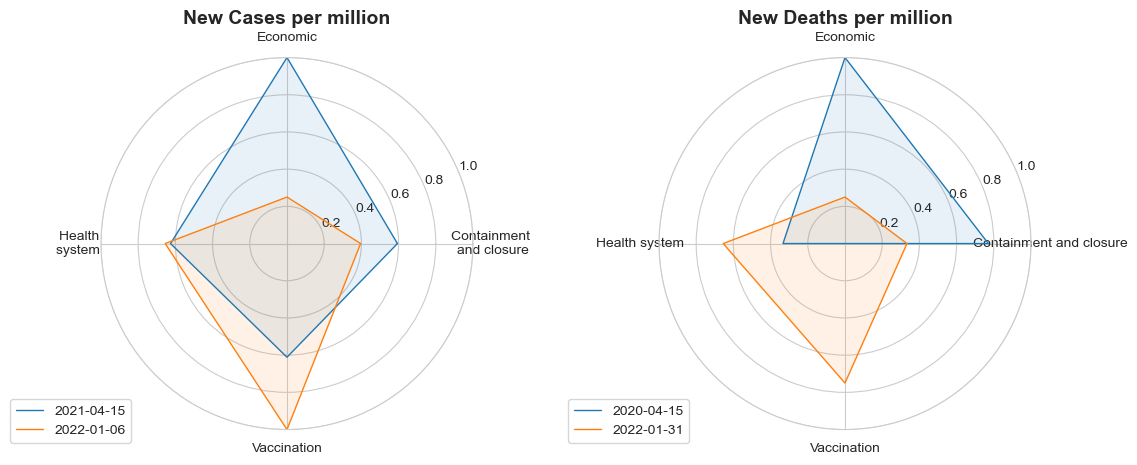

In [303]:
#Only last 4 collumns for new cases
data= df_relative_strength.loc[(df_relative_strength["location"] == country) & (df_relative_strength["date"].isin([lowest_case_date, highest_case_date])), ['date', 'Containment_Average', 'Economic_Average', 'Health_system_Average', 'Vaccination_Average']]
data = data.set_index('date')
# get the number of variables
categories = list(data.columns)
N = len(categories)
# create a list of angles for the radar chart
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
# create the subplots for the radar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': 'polar'})

ax1.set_ylim(0, 1)

# plot the data on the first radar chart
for i in range(len(data)):
    values = data.iloc[i].values.flatten().tolist()
    values += values[:1]
    ax1.plot(angles, values, linewidth=1, linestyle='solid', label=data.index[i])
    ax1.fill(angles, values, alpha=0.1)

# add the legend to the first chart
ax1.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# add the grid and axis labels to the first chart
ax1.set_thetagrids(np.degrees(angles[:-1]), ['Containment \nand closure','Economic','Health \nsystem  ','Vaccination'])
ax1.grid(True)
ax1.set_title('New Cases per million', fontsize=14, fontweight='bold')

#Only last 4 collumns for new deaths
data_death= df_relative_strength.loc[(df_relative_strength["location"] == country) & (df_relative_strength["date"].isin([lowest_death_date, highest_death_date])), ['date', 'Containment_Average', 'Economic_Average', 'Health_system_Average', 'Vaccination_Average']]
data_death = data_death.set_index('date')
# get the number of variables
categories = list(data_death.columns)
N = len(categories)
# create a list of angles for the radar chart
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# plot the data on the second radar chart
ax2.set_ylim(0, 1)

for i in range(len(data_death)):
    values = data_death.iloc[i].values.flatten().tolist()
    values += values[:1]
    ax2.plot(angles, values, linewidth=1, linestyle='solid', label=data_death.index[i])
    ax2.fill(angles, values, alpha=0.1)

# add the legend to the second chart
ax2.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# add the grid and axis labels to the second chart
ax2.set_thetagrids(np.degrees(angles[:-1]), ['Containment and closure','Economic','Health system','Vaccination'])
ax2.grid(True)
ax2.set_title('New Deaths per million', fontsize=14, fontweight='bold')


fig.subplots_adjust(wspace=0.5)
# show the plot
plt.show()